# Crypto Prices 

## Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

## Data Files

In [2]:
usdt = pd.read_csv("../data/usdt_price_data.csv")
ustc = pd.read_csv("../data/ustc_price_data.csv")
usdc = pd.read_csv("../data/usdc_price_data.csv")
pax = pd.read_csv("../data/pax_price_data.csv")
wluna = pd.read_csv("../data/wluna_price_data.csv")
dai = pd.read_csv("../data/dai_price_data.csv")

## Exploration

Dataframe dimensions

In [3]:
print(usdt.shape, ustc.shape, usdc.shape, pax.shape, wluna.shape, dai.shape)

(215, 5) (215, 5) (215, 5) (215, 5) (215, 5) (215, 5)


NaN values

In [4]:
print(usdt.isna().sum(), ustc.isna().sum(), usdc.isna().sum(), pax.isna().sum(), wluna.isna().sum(), dai.isna().sum())

timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64 timestamp    0
open         0
high         0
low          0
close        0
dtype: int64


Dataframe Description

In [5]:
prices = {"usdt": usdt, "usdc": usdc, "ustc": ustc, "pax": pax, "wluna": wluna, "dai": dai}

for crypto in prices: 
    print(crypto, "\n", prices[crypto].describe(), "\n")

usdt 
           timestamp        open        high         low       close
count  2.150000e+02  215.000000  215.000000  215.000000  215.000000
mean   1.658102e+09    0.999690    0.999776    0.999346    0.999689
std    5.374886e+06    0.000519    0.000371    0.003553    0.000519
min    1.648858e+09    0.995900    0.997700    0.948500    0.995900
25%    1.653480e+09    0.999400    0.999500    0.999200    0.999350
50%    1.658102e+09    1.000000    1.000000    0.999900    1.000000
75%    1.662725e+09    1.000000    1.000000    1.000000    1.000000
max    1.667347e+09    1.000000    1.000000    1.000000    1.000000 

usdc 
           timestamp        open        high         low       close
count  2.150000e+02  215.000000  215.000000  215.000000  215.000000
mean   1.658102e+09    0.999934    1.000047    0.999579    0.999936
std    5.374886e+06    0.000107    0.000682    0.000295    0.000105
min    1.648858e+09    0.999300    1.000000    0.997300    0.999300
25%    1.653480e+09    0.999900 

Convert Timestamp to readable dates

In [6]:
for crypto in prices:

    prices[crypto]['datetime'] = pd.to_datetime(prices[crypto]['timestamp'], unit='s').dt.date
    prices[crypto] = prices[crypto].drop(columns= ["timestamp"])

    print(prices[crypto].head())


   open  high  low  close    datetime
0   1.0   1.0  1.0    1.0  2022-04-02
1   1.0   1.0  1.0    1.0  2022-04-03
2   1.0   1.0  1.0    1.0  2022-04-04
3   1.0   1.0  1.0    1.0  2022-04-05
4   1.0   1.0  1.0    1.0  2022-04-06
     open  high     low   close    datetime
0  0.9995   1.0  0.9990  0.9999  2022-04-02
1  1.0000   1.0  0.9991  0.9993  2022-04-03
2  0.9993   1.0  0.9985  1.0000  2022-04-04
3  1.0000   1.0  0.9989  1.0000  2022-04-05
4  1.0000   1.0  0.9990  0.9997  2022-04-06
     open  high     low   close    datetime
0  1.0000   1.0  0.9989  1.0000  2022-04-02
1  1.0000   1.0  0.9986  1.0000  2022-04-03
2  1.0000   1.0  0.9990  0.9999  2022-04-04
3  0.9999   1.0  0.9963  1.0000  2022-04-05
4  1.0000   1.0  0.9976  0.9984  2022-04-06
   open  high     low   close    datetime
0   1.0   1.0  0.9962  1.0000  2022-04-02
1   1.0   1.0  0.9982  1.0000  2022-04-03
2   1.0   1.0  0.9975  1.0000  2022-04-04
3   1.0   1.0  0.9986  1.0000  2022-04-05
4   1.0   1.0  0.9973  0.9998  202

# Time Plots

Append the open prices of each crypto to a single dataframe

In [7]:
openprices = pd.DataFrame({
    'datetime': usdc.datetime,
    'usdc': usdc.open,
    'usdt':usdt.open,
    'ustc':ustc.open,
    'pax':pax.open,
    'dai':dai.open,
    'wluna':wluna.open
})

openprices.head()

,datetime,usdc,usdt,ustc,pax,dai,wluna
0,2022-04-02,0.9995,1.0,1.0000,1.0,0.9999,103.23
1,2022-04-03,1.0000,1.0,1.0000,1.0,1.0000,105.90
2,2022-04-04,0.9993,1.0,1.0000,1.0,0.9990,115.46
3,2022-04-05,1.0000,1.0,0.9999,1.0,0.9994,113.40
4,2022-04-06,1.0000,1.0,1.0000,1.0,0.9999,115.99


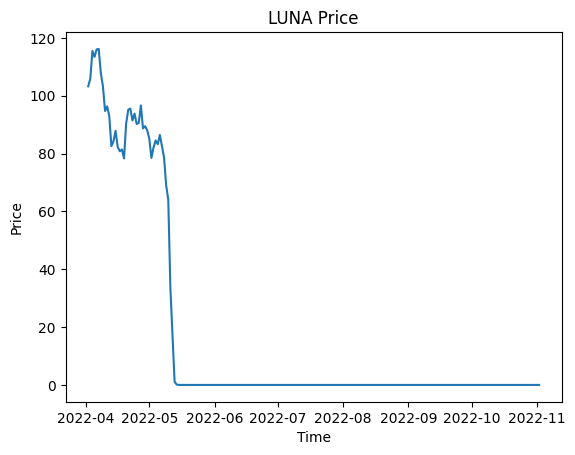

In [8]:
plt.plot(wluna["datetime"],wluna['open'])
plt.title("LUNA Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.show()

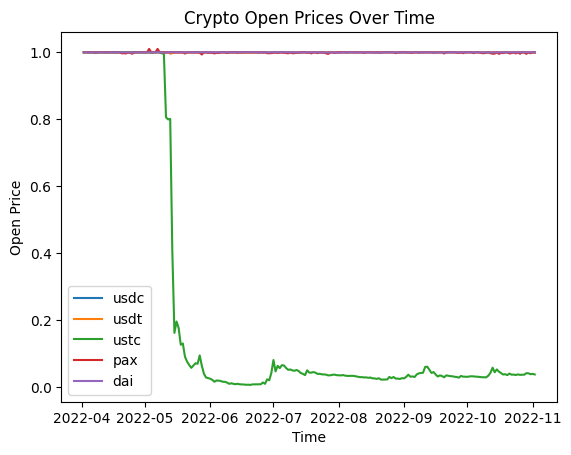

In [9]:
x = openprices['datetime']

# Columns to plot (all except 'datetime')
cryptos = ['usdc', 'usdt', 'ustc', 'pax', 'dai']

for crypto in cryptos:
    plt.plot(x, openprices[crypto], label=crypto)

plt.xlabel('Time')
plt.ylabel('Open Price')
plt.title('Crypto Open Prices Over Time')
plt.legend()
plt.show()


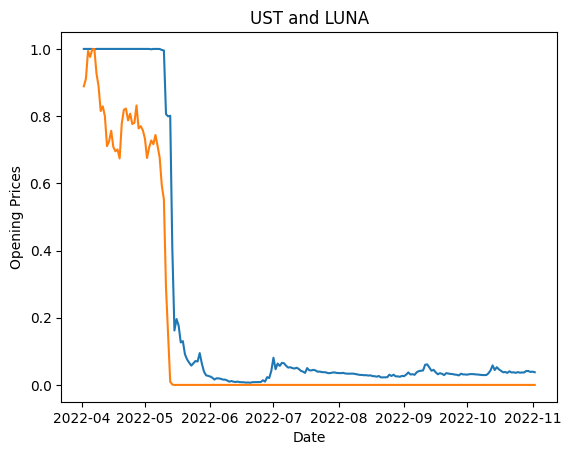

In [10]:
wluna_norm = (wluna.open - wluna.open.min()) / (wluna.open.max() - wluna.open.min())

plt.plot(ustc.datetime, ustc.open, label = "UST")
plt.plot(wluna.datetime, wluna_norm, label = "LUNA")
plt.title("UST and LUNA")
plt.xlabel("Date")
plt.ylabel("Opening Prices")
plt.show()

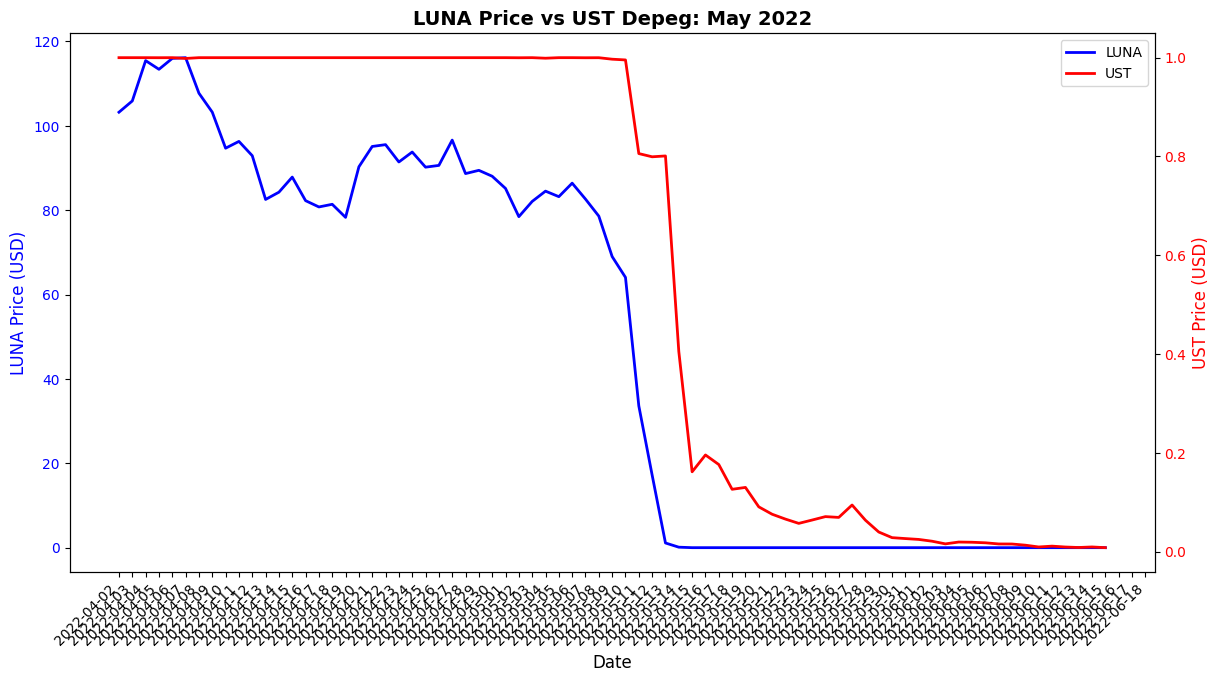

In [11]:
fig, ax1 = plt.subplots(figsize = (14, 7))
ax2 = ax1.twinx()

ax1.plot(wluna.datetime[:75], wluna.open[:75], 'b-', linewidth = 2, label = 'LUNA')
ax1.set_ylabel('LUNA Price (USD)', color='b', fontsize=12)
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticks(wluna['datetime'])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right') 

ax2.plot(ustc.datetime[:75], ustc.open[:75], 'r-', linewidth = 2, label = "UST")
ax2.set_ylabel('UST Price (USD)', color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')

plt.title('LUNA Price vs UST Depeg: May 2022', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.show()

Text(0.5, 1.0, 'PAX Price')

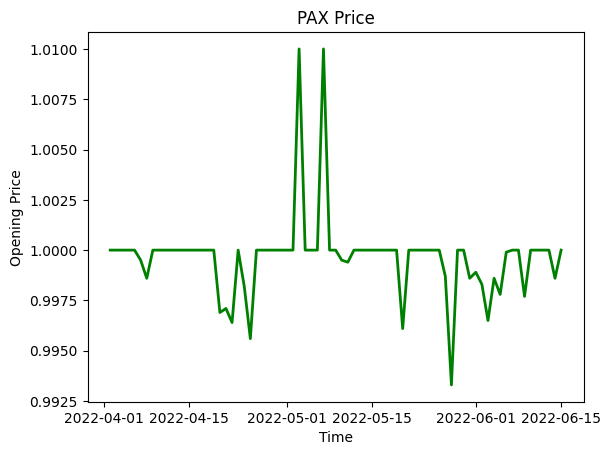

In [12]:
plt.plot(pax.datetime[:75], pax.open[:75],'-g', linewidth = 2, label = "PAX")
plt.ylabel("Opening Price")
plt.xlabel("Time")
plt.title("PAX Price")

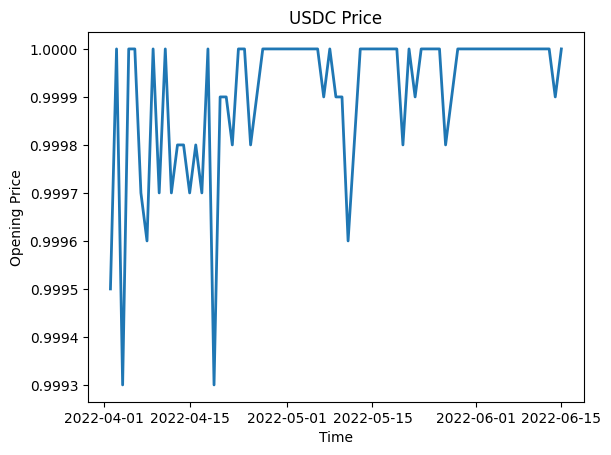

In [13]:
plt.plot(usdc.datetime[:75], usdc.open[:75], linewidth = 2, label = "USDC")
plt.ylabel("Opening Price")
plt.xlabel("Time")
plt.title("USDC Price")
plt.show()

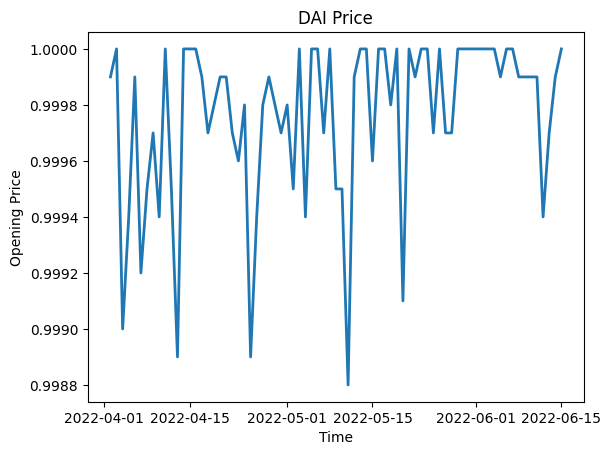

In [14]:
plt.plot(dai.datetime[:75], dai.open[:75], linewidth = 2, label = "DAI")
plt.ylabel("Opening Price")
plt.xlabel("Time")
plt.title("DAI Price")
plt.show()

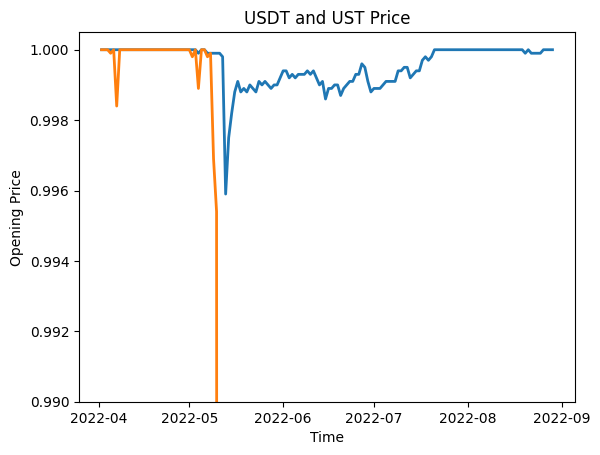

In [15]:
plt.plot(usdt.datetime[:150], usdt.open[:150], linewidth = 2, label = "USDT")
plt.plot(ustc.datetime[:150], ustc.open[:150], linewidth = 2, label = "UST")
plt.ylim(0.99, 1.0005)  
plt.ylabel("Opening Price")
plt.xlabel("Time")
plt.title("USDT and UST Price")
plt.show()

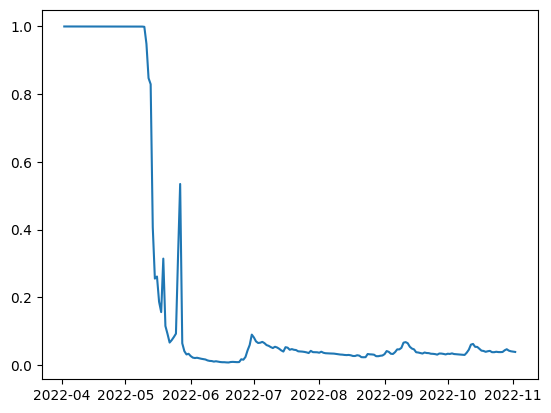

In [16]:
plt.plot(ustc.datetime, ustc.high)
plt.show()

Question: How far does UST trade from 1USD over time

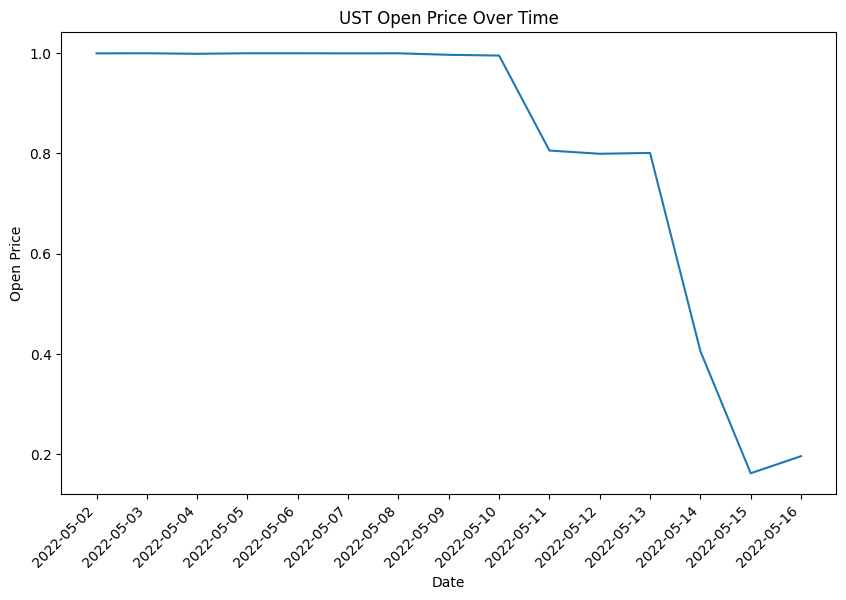

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(ustc['datetime'][30:45], ustc['open'][30:45])
plt.xticks(ustc['datetime'][30:45], rotation = 45, ha = 'right')
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("UST Open Price Over Time")

plt.show()

Calculate rolling standard deviation or daily % changes

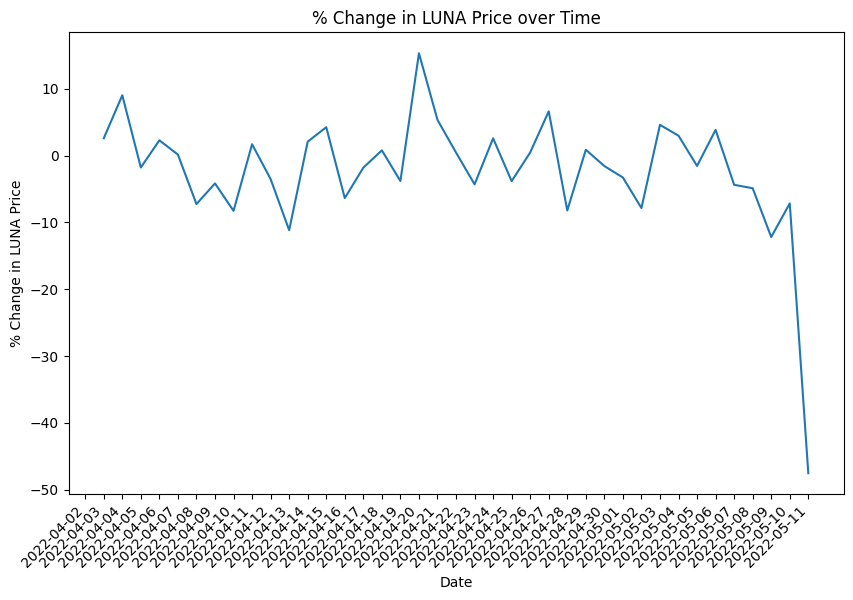

In [18]:
luna_pct = wluna['open'].pct_change() * 100

plt.figure(figsize=(10, 6))
plt.plot(wluna['datetime'][:40],luna_pct[:40])
plt.xticks(wluna['datetime'][:40], rotation = 45, ha = 'right')
plt.xlabel("Date")
plt.ylabel("% Change in LUNA Price")
plt.title("% Change in LUNA Price over Time")
plt.show()

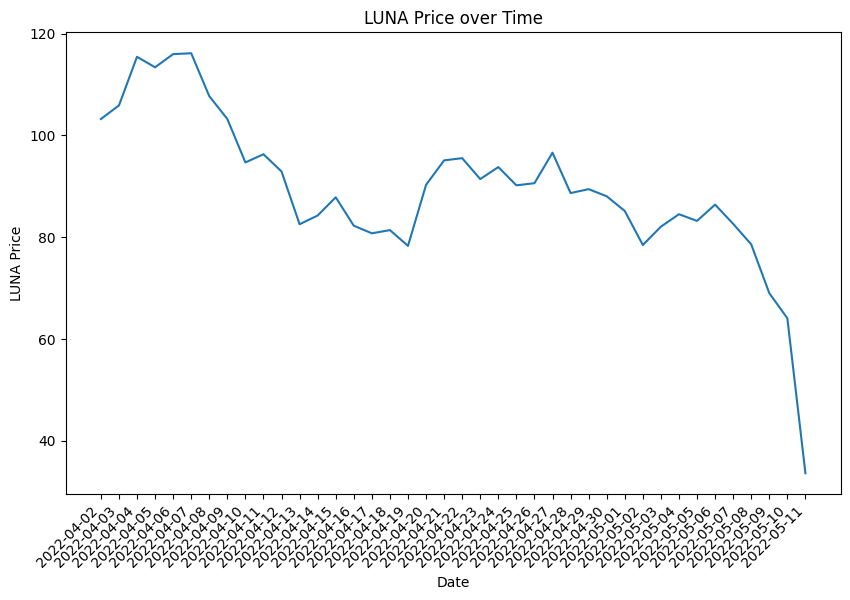

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(wluna['datetime'][:40],wluna['open'][:40])
plt.xticks(wluna['datetime'][:40], rotation = 45, ha = 'right')
plt.xlabel("Date")
plt.ylabel("LUNA Price")
plt.title("LUNA Price over Time")
plt.show()

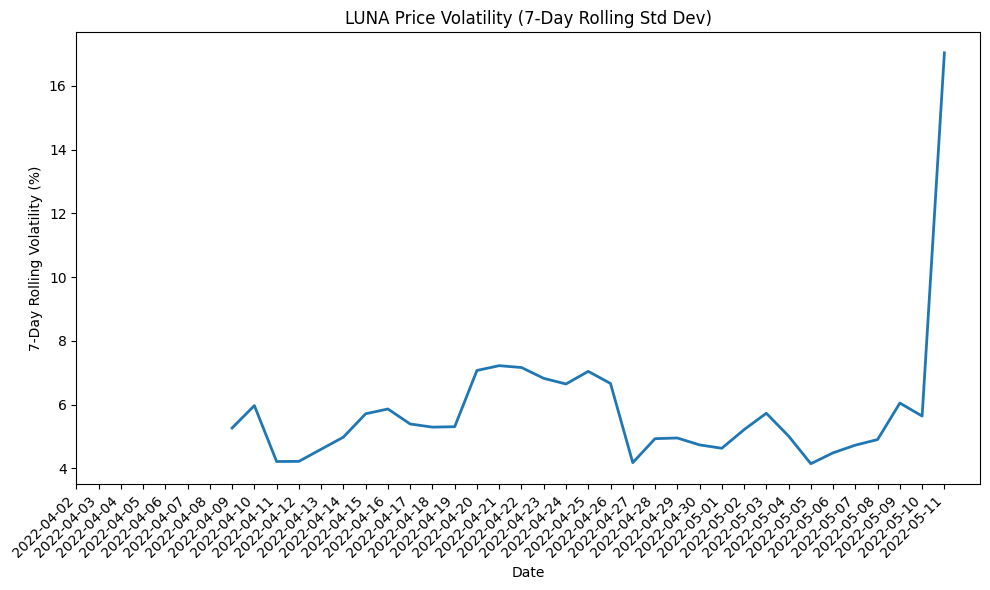

In [20]:
# Calculate rolling std dev of returns over a window (e.g., 7 days)
wluna_returns = wluna['open'][:40].pct_change()
rolling_volatility = wluna_returns.rolling(window=7).std() * 100

# Plot it
plt.figure(figsize=(10, 6))
plt.plot(wluna['datetime'][:40], rolling_volatility, linewidth=2)
plt.ylabel('7-Day Rolling Volatility (%)')
plt.xlabel('Date')
plt.title('LUNA Price Volatility (7-Day Rolling Std Dev)')
plt.xticks(wluna['datetime'][:40],rotation=45, ha='right')
plt.tight_layout()
plt.show()

Contagion to other stablecoins - Do DAI, USDT, USDC, PAX also show peg deviations during the same period? Plot them together

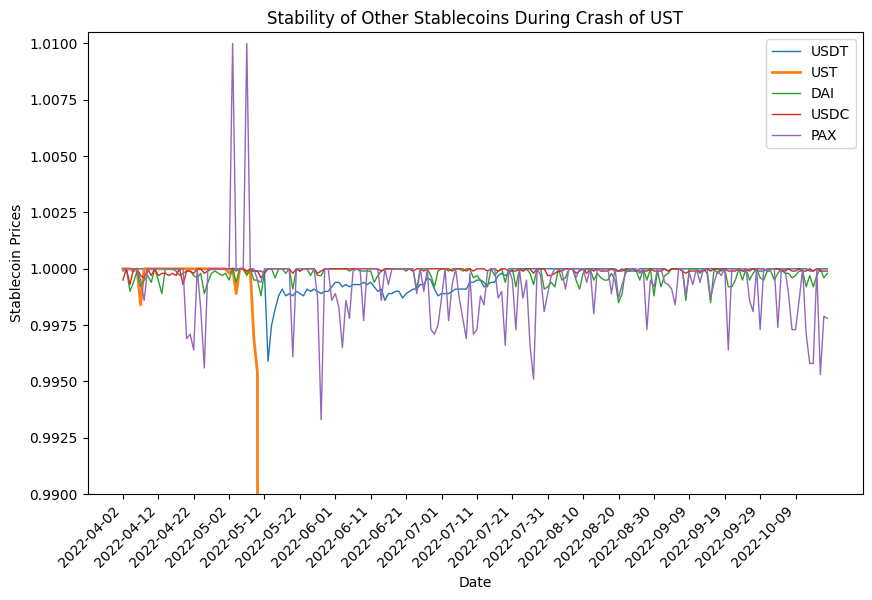

In [21]:
x = 200
plt.figure(figsize=(10,6))
plt.plot(usdt.datetime[:x], usdt.open[:x], linewidth = 1, label = "USDT")
plt.plot(ustc.datetime[:x], ustc.open[:x], linewidth = 2, label = "UST")
plt.plot(dai.datetime[:x], dai.open[:x], linewidth = 1, label = "DAI")
plt.plot(usdc.datetime[:x], usdc.open[:x], linewidth = 1, label = "USDC")
plt.plot(pax.datetime[:x], pax.open[:x], linewidth = 1, label = "PAX")
plt.xticks(usdt.datetime[:x:10],rotation=45, ha = 'right')
plt.ylim(0.99, 1.0105)  
plt.xlabel("Date")
plt.ylabel("Stablecoin Prices")
plt.title("Stability of Other Stablecoins During Crash of UST")
plt.legend()
plt.show()

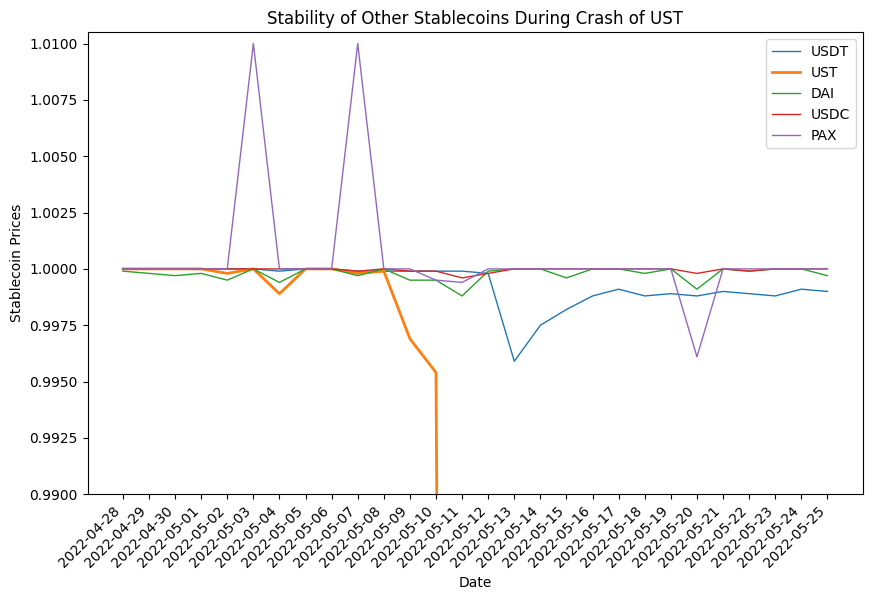

In [29]:
y = 26
x = 54
plt.figure(figsize=(10,6))
plt.plot(usdt.datetime[y:x], usdt.open[y:x], linewidth = 1, label = "USDT")
plt.plot(ustc.datetime[y:x], ustc.open[y:x], linewidth = 2, label = "UST")
plt.plot(dai.datetime[y:x], dai.open[y:x], linewidth = 1, label = "DAI")
plt.plot(usdc.datetime[y:x], usdc.open[y:x], linewidth = 1, label = "USDC")
plt.plot(pax.datetime[y:x], pax.open[y:x], linewidth = 1, label = "PAX")
plt.xticks(usdt.datetime[y:x],rotation=45, ha = 'right')
plt.ylim(0.99, 1.0105)  
plt.xlabel("Date")
plt.ylabel("Stablecoin Prices")
plt.title("Stability of Other Stablecoins During Crash of UST")
plt.legend()
plt.show()

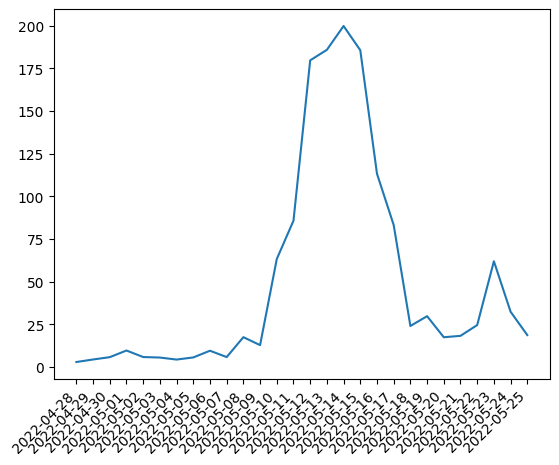

In [33]:
wluna['pct_range'] = (wluna['high']-wluna['low'])/((wluna['high']+wluna['low'])/2) *100

plt.plot(wluna['datetime'][26:54], wluna['pct_range'][26:54])
plt.xticks(wluna['datetime'][26:54], rotation = 45, ha = 'right')
plt.show()

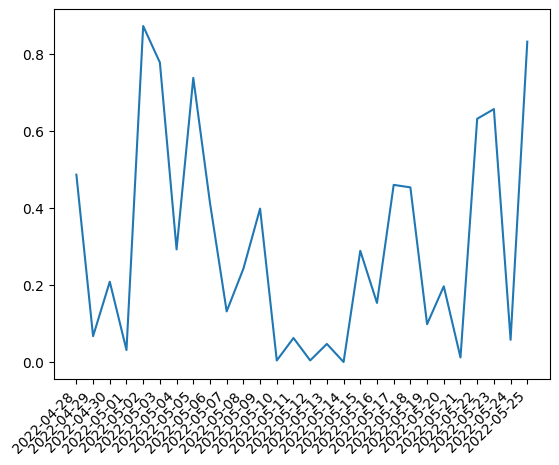

In [34]:
wluna['close_position'] = (wluna['close'] - wluna['low']) / (wluna['high'] - wluna['low'])

plt.plot(wluna['datetime'][26:54], wluna['close_position'][26:54])
plt.xticks(wluna['datetime'][26:54], rotation = 45, ha = 'right')
plt.show()

In [ ]:
# Determine candle components
wluna['body'] = abs(wluna['close'] - wluna['open'])
wluna['upper_shadow'] = wluna['high'] - wluna[['open', 'close']].max(axis=1)
wluna['lower_shadow'] = wluna[['open', 'close']].min(axis=1) - wluna['low']

# Bullish or bearish?
wluna['candle_type'] = wluna.apply(
    lambda row: 'bullish' if row['close'] > row['open'] else 'bearish', 
    axis=1
)

# Long bearish candles (5%+ drop)
wluna['long_bearish'] = (wluna['open'] - wluna['close']) / wluna['open'] > 0.05

# Doji (indecision - small body relative to range)
wluna['doji'] = abs(wluna['close'] - wluna['open']) / (wluna['high'] - wluna['low']) < 0.1

# Hammer (potential reversal - long lower shadow)
wluna['hammer'] = (
    (wluna['lower_shadow'] > 2 * wluna['body']) &  # Long lower shadow
    (wluna['upper_shadow'] < wluna['body'])  # Short upper shadow
)

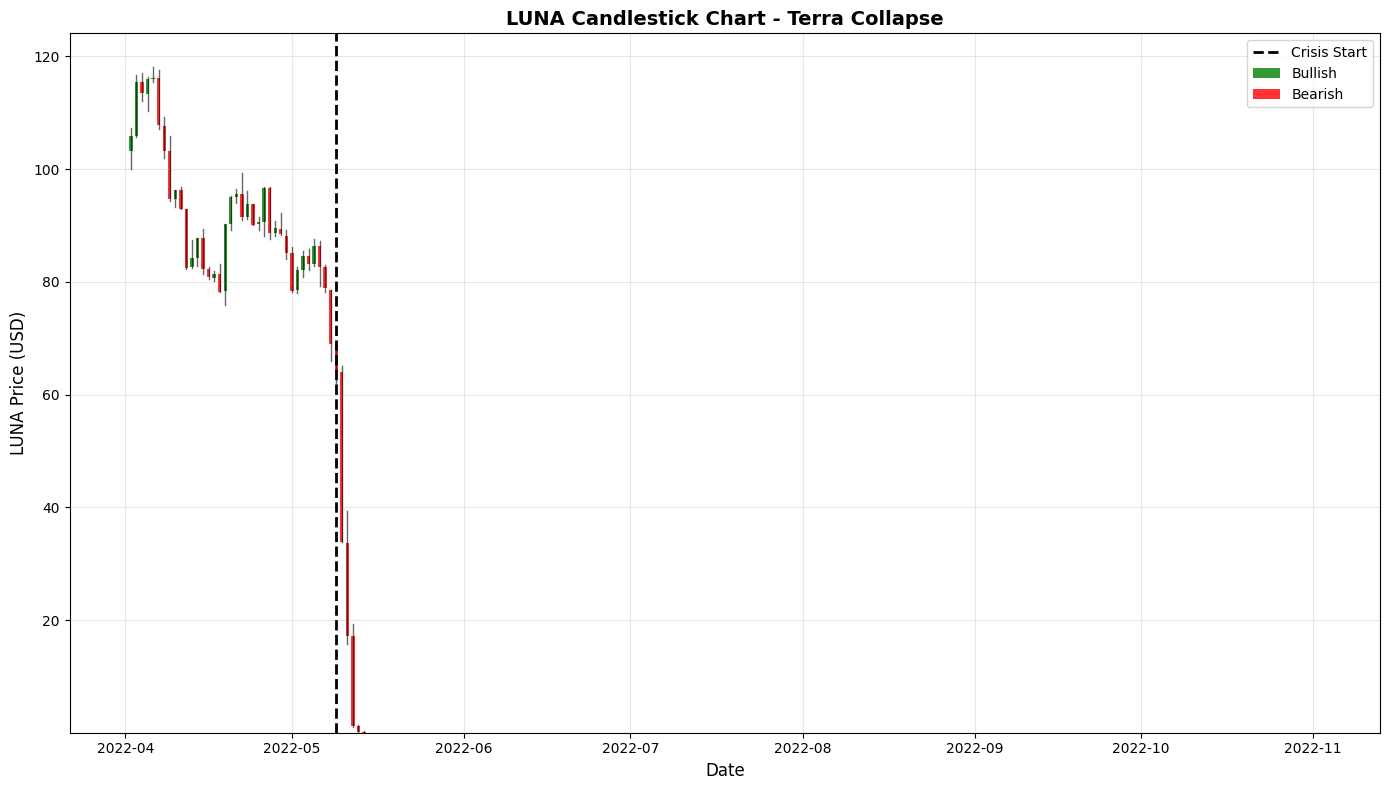

In [35]:
fig, ax = plt.subplots(figsize=(14, 8))

# Separate bullish and bearish candles
bullish = wluna['close'] >= wluna['open']
bearish = wluna['close'] < wluna['open']

# Plot bullish candles (green)
ax.bar(wluna.loc[bullish, 'datetime'], 
       wluna.loc[bullish, 'close'] - wluna.loc[bullish, 'open'],  # Height of body
       bottom=wluna.loc[bullish, 'open'],  # Start at open
       color='green', 
       width=0.6, 
       label='Bullish',
       alpha=0.8)

# Plot bearish candles (red)
ax.bar(wluna.loc[bearish, 'datetime'],
       wluna.loc[bearish, 'open'] - wluna.loc[bearish, 'close'],  # Height of body
       bottom=wluna.loc[bearish, 'close'],  # Start at close
       color='red', 
       width=0.6, 
       label='Bearish',
       alpha=0.8)

# Add high-low wicks (shadows)
for idx, row in wluna.iterrows():
    ax.plot([row['datetime'], row['datetime']], 
            [row['low'], row['high']], 
            color='black', 
            linewidth=1, 
            alpha=0.6)

# Formatting
ax.axvline(x=pd.Timestamp('2022-05-09'), color='black', linestyle='--', linewidth=2, label='Crisis Start')
ax.set_ylabel('LUNA Price (USD)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_title('LUNA Candlestick Chart - Terra Collapse', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

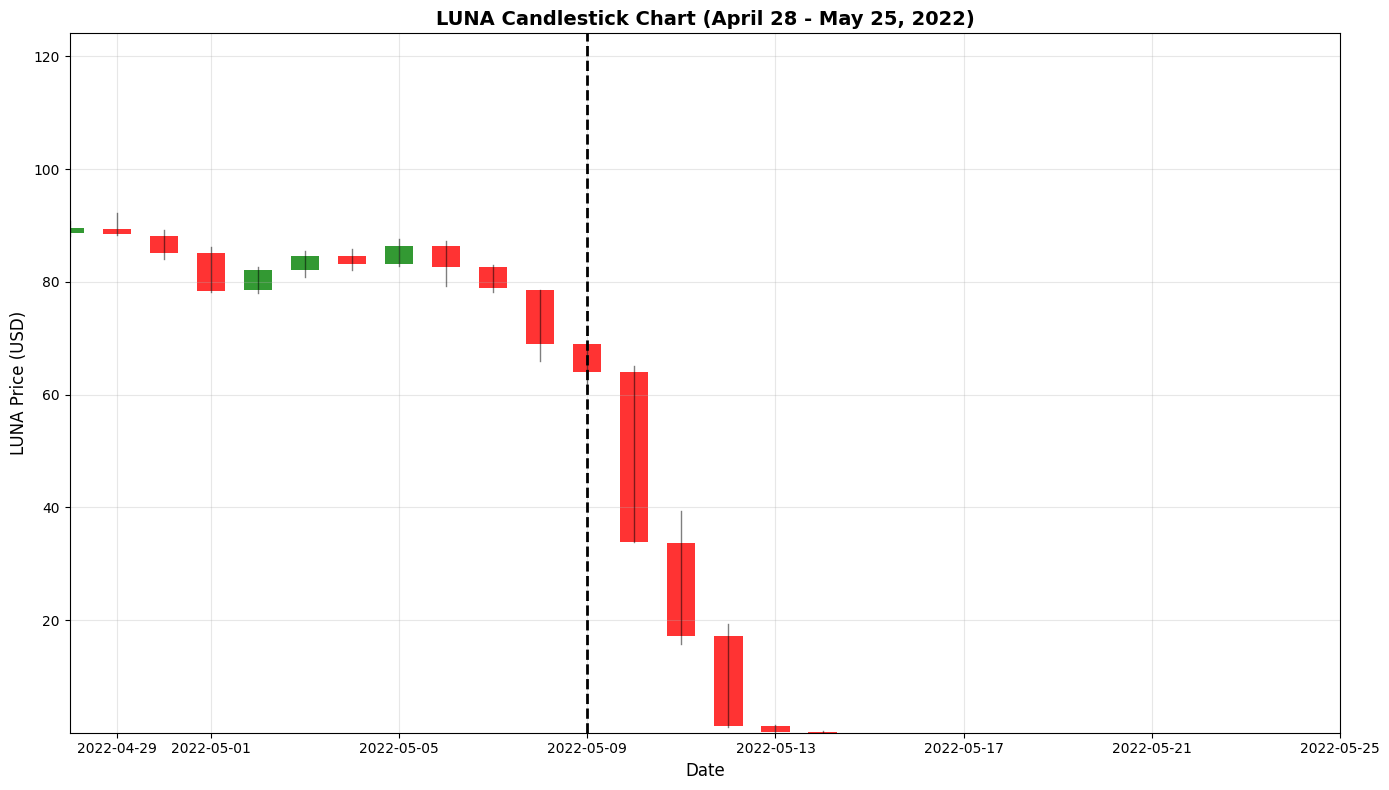

In [39]:
# Use full wluna but just zoom the plot
fig, ax = plt.subplots(figsize=(14, 8))

bullish = wluna['close'] >= wluna['open']
bearish = wluna['close'] < wluna['open']

ax.bar(wluna.loc[bullish, 'datetime'], 
       wluna.loc[bullish, 'close'] - wluna.loc[bullish, 'open'],
       bottom=wluna.loc[bullish, 'open'],
       color='green', width=0.6, alpha=0.8)

ax.bar(wluna.loc[bearish, 'datetime'],
       wluna.loc[bearish, 'open'] - wluna.loc[bearish, 'close'],
       bottom=wluna.loc[bearish, 'close'],
       color='red', width=0.6, alpha=0.8)

# Add wicks
for idx, row in wluna.iterrows():
    ax.plot([row['datetime'], row['datetime']], 
            [row['low'], row['high']], 
            color='black', linewidth=1, alpha=0.5)

# Set x-axis limits to your date range
ax.set_xlim(pd.Timestamp('2022-04-28'), pd.Timestamp('2022-05-25'))

ax.axvline(x=pd.Timestamp('2022-05-09'), color='black', linestyle='--', linewidth=2)
ax.set_ylabel('LUNA Price (USD)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_title('LUNA Candlestick Chart (April 28 - May 25, 2022)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

KeyError: 'hammer'

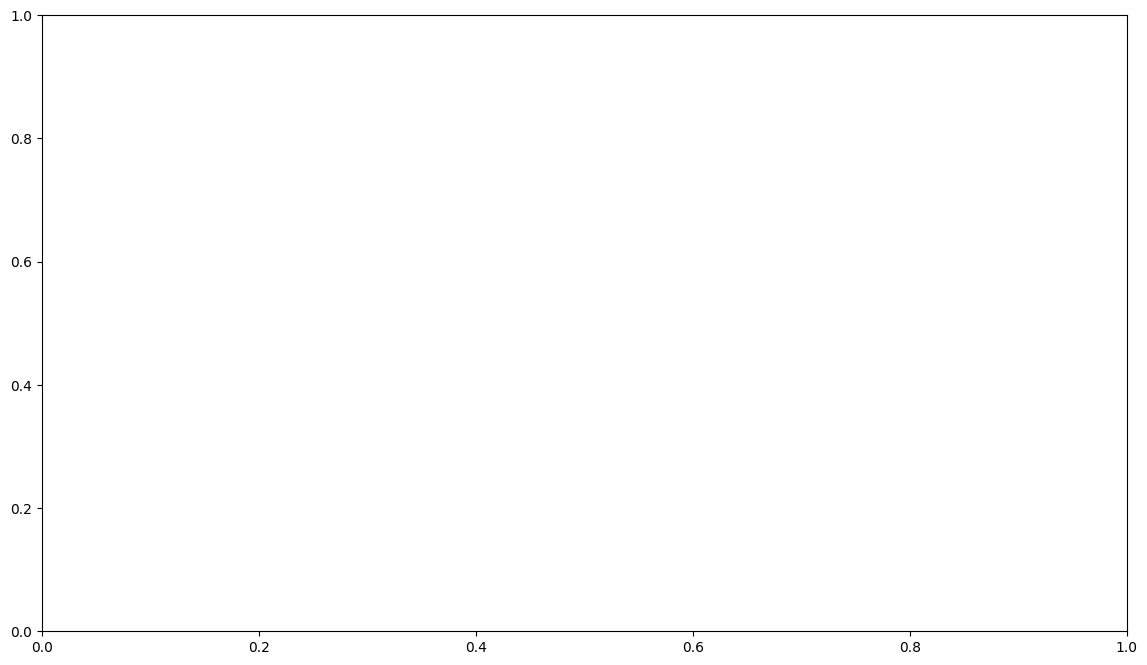

In [41]:
fig, ax = plt.subplots(figsize=(14, 8))

# Base candlesticks
bullish = wluna['close'] >= wluna['open']
bearish = wluna['close'] < wluna['open']

# Normal candles
ax.bar(wluna.loc[bullish & ~wluna['hammer'], 'datetime'], 
       wluna.loc[bullish & ~wluna['hammer'], 'close'] - wluna.loc[bullish & ~wluna['hammer'], 'open'],
       bottom=wluna.loc[bullish & ~wluna['hammer'], 'open'],
       color='green', width=0.6, alpha=0.7, label='Bullish')

ax.bar(wluna.loc[bearish & ~wluna['long_bearish'], 'datetime'],
       wluna.loc[bearish & ~wluna['long_bearish'], 'open'] - wluna.loc[bearish & ~wluna['long_bearish'], 'close'],
       bottom=wluna.loc[bearish & ~wluna['long_bearish'], 'close'],
       color='red', width=0.6, alpha=0.7, label='Bearish')

# Highlight LONG BEARISH candles (>5% drop)
if wluna['long_bearish'].any():
    ax.bar(wluna.loc[wluna['long_bearish'], 'datetime'],
           wluna.loc[wluna['long_bearish'], 'open'] - wluna.loc[wluna['long_bearish'], 'close'],
           bottom=wluna.loc[wluna['long_bearish'], 'close'],
           color='darkred', width=0.8, alpha=0.9, label='Long Bearish (>5% drop)', 
           edgecolor='black', linewidth=2)

# Highlight HAMMER candles (potential reversal)
if wluna['hammer'].any():
    ax.bar(wluna.loc[wluna['hammer'], 'datetime'],
           abs(wluna.loc[wluna['hammer'], 'close'] - wluna.loc[wluna['hammer'], 'open']),
           bottom=wluna.loc[wluna['hammer'], [['open', 'close']].min(axis=1)],
           color='yellow', width=0.8, alpha=0.9, label='Hammer (reversal signal)',
           edgecolor='black', linewidth=2)

# Highlight DOJI candles (indecision)
if wluna['doji'].any():
    ax.scatter(wluna.loc[wluna['doji'], 'datetime'],
               wluna.loc[wluna['doji'], 'close'],
               color='purple', s=100, marker='D', label='Doji (indecision)', zorder=5)

# Add wicks
for idx, row in wluna.iterrows():
    ax.plot([row['datetime'], row['datetime']], 
            [row['low'], row['high']], 
            color='black', linewidth=1, alpha=0.5)

# Formatting
ax.axvline(x=pd.Timestamp('2022-05-09'), color='black', linestyle='--', linewidth=2, label='Crisis Start')
ax.set_ylabel('LUNA Price (USD)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_title('LUNA Candlestick Patterns - Identifying Crisis Signals', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

KeyError: 'long_bearish'

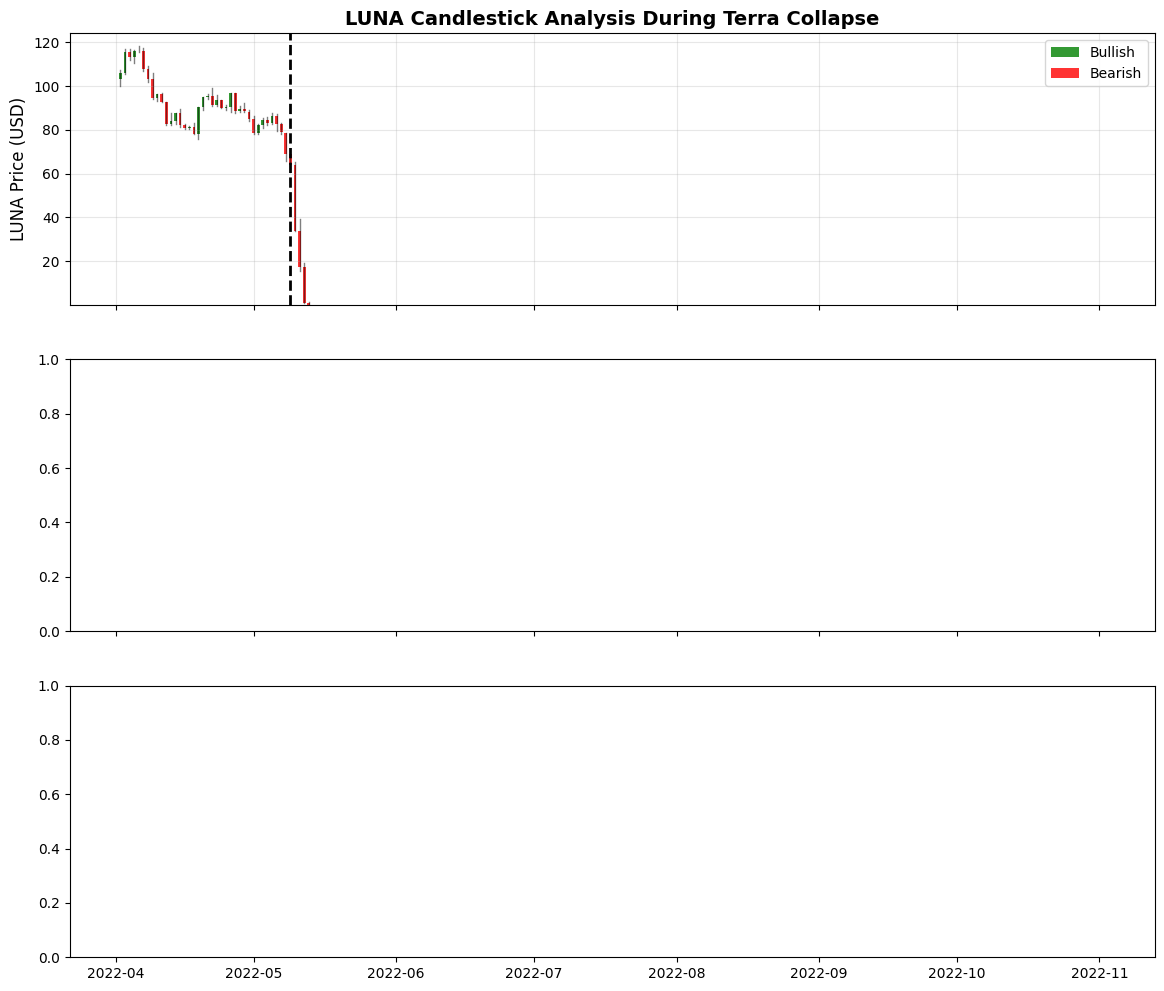

In [40]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# ========== Panel 1: Candlestick Chart ==========
ax1 = axes[0]

bullish = wluna['close'] >= wluna['open']
bearish = wluna['close'] < wluna['open']

# Bullish candles
ax1.bar(wluna.loc[bullish, 'datetime'], 
        wluna.loc[bullish, 'close'] - wluna.loc[bullish, 'open'],
        bottom=wluna.loc[bullish, 'open'],
        color='green', width=0.6, alpha=0.8, label='Bullish')

# Bearish candles
ax1.bar(wluna.loc[bearish, 'datetime'],
        wluna.loc[bearish, 'open'] - wluna.loc[bearish, 'close'],
        bottom=wluna.loc[bearish, 'close'],
        color='red', width=0.6, alpha=0.8, label='Bearish')

# Wicks
for idx, row in wluna.iterrows():
    ax1.plot([row['datetime'], row['datetime']], 
             [row['low'], row['high']], 
             color='black', linewidth=1, alpha=0.5)

ax1.axvline(x=pd.Timestamp('2022-05-09'), color='black', linestyle='--', linewidth=2)
ax1.set_ylabel('LUNA Price (USD)', fontsize=12)
ax1.set_title('LUNA Candlestick Analysis During Terra Collapse', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# ========== Panel 2: Pattern Frequency ==========
ax2 = axes[1]

# Count patterns over time (rolling 7-day window)
wluna['long_bearish_count'] = wluna['long_bearish'].rolling(window=7).sum()
wluna['hammer_count'] = wluna['hammer'].rolling(window=7).sum()
wluna['doji_count'] = wluna['doji'].rolling(window=7).sum()

ax2.plot(wluna['datetime'], wluna['long_bearish_count'], 
         color='red', linewidth=2, label='Long Bearish (7-day)', marker='o', markersize=3)
ax2.plot(wluna['datetime'], wluna['hammer_count'], 
         color='yellow', linewidth=2, label='Hammer (7-day)', marker='s', markersize=3)
ax2.plot(wluna['datetime'], wluna['doji_count'], 
         color='purple', linewidth=2, label='Doji (7-day)', marker='^', markersize=3)

ax2.axvline(x=pd.Timestamp('2022-05-09'), color='black', linestyle='--', linewidth=2)
ax2.set_ylabel('Pattern Count (7-day rolling)', fontsize=12)
ax2.set_title('Candlestick Pattern Frequency', fontsize=12)
ax2.legend()
ax2.grid(True, alpha=0.3)

# ========== Panel 3: Body vs Shadow Ratio ==========
ax3 = axes[2]

# Calculate ratios
wluna['body_shadow_ratio'] = wluna['body'] / (wluna['upper_shadow'] + wluna['lower_shadow'] + 0.001)

ax3.bar(wluna['datetime'], wluna['body_shadow_ratio'], 
        color=['green' if ct == 'bullish' else 'red' for ct in wluna['candle_type']],
        alpha=0.7)

ax3.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Equal body/shadow')
ax3.axvline(x=pd.Timestamp('2022-05-09'), color='black', linestyle='--', linewidth=2, label='Crisis Start')
ax3.set_ylabel('Body/Shadow Ratio', fontsize=12)
ax3.set_xlabel('Date', fontsize=12)
ax3.set_title('Candle Body vs Shadow Strength', fontsize=12)
ax3.legend()
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()